In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 


[[250 254 254 ... 253 251 253]
 [250 252 254 ... 255 255 254]
 [250 249 248 ... 247 248 248]
 ...
 [247 242 246 ... 246 245 243]
 [249 222 216 ... 214 203 253]
 [251 232 224 ... 221 219 248]]


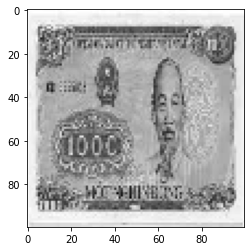

In [4]:
datadrive = "/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data"
phanloai=['1000','10000','100000','2000','20000','200000','500','5000','50000','500000']
img_size=100
for food in phanloai:
  path=os.path.join(datadrive,food)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE) #thay màu cho đối tượng
    new_array = cv.resize(img_array,(img_size,img_size)) #resize lại hình ảnh
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [5]:
#creating training data
training_data=[]
def create_traning_data():

  for money in phanloai:
    path = os.path.join(datadrive,money)
    class_num = phanloai.index(money)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 11/11 [00:02<00:00,  3.96it/s]

110


In [6]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (110, 100, 100, 1)
y (110,)


In [7]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [8]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [9]:
pickle_in = open("/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (110, 100, 100, 1)
y (110,)


In [10]:
y= to_categorical(y,10)

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))


In [12]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/30
2/2 [==============================] - 13s 923ms/step - loss: 4.2985 - accuracy: 0.0909 - val_loss: 5.5645 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 55ms/step - loss: 3.0557 - accuracy: 0.1111 - val_loss: 2.9620 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 53ms/step - loss: 2.2829 - accuracy: 0.1717 - val_loss: 3.4316 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 54ms/step - loss: 2.2077 - accuracy: 0.1616 - val_loss: 4.1239 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 0s 54ms/step - loss: 2.1869 - accuracy: 0.1818 - val_loss: 4.4588 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 0s 56ms/step - loss: 2.0944 - accuracy: 0.2828 - val_loss: 5.6246 - val_accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 0s 53ms/step - loss: 2.0585 - accuracy: 0.2121 - val_loss: 5.5556 - val_accuracy: 0.0000e+

In [13]:
model.save('baitapphanloaitienVN.h5')

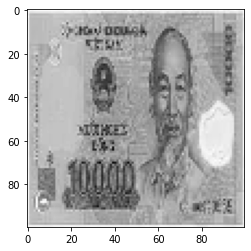

In [14]:
img_test='/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/10000/2.jpg'
categories=['1000','10000','100000','2000','20000','200000','500','5000','50000','500000']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

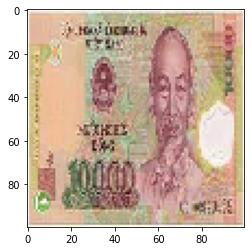

Prediction value: 10000


In [15]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value:',categories[int(np.argmax(prediction))])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation 1000


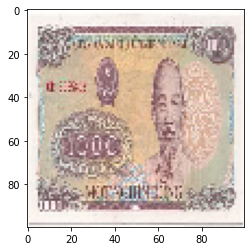

In [21]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/1000.jpeg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation 10000


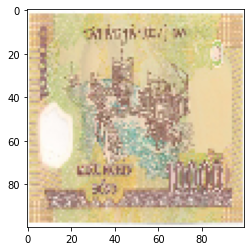

In [18]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/10000.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation 100000


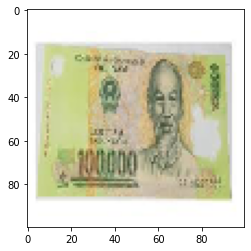

In [22]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/100000.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation 1000


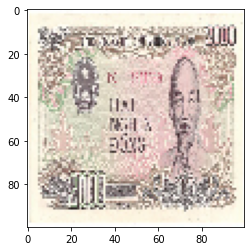

In [25]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/2000.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation 20000


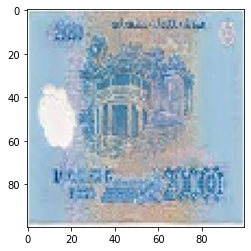

In [26]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/20000.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation 200000


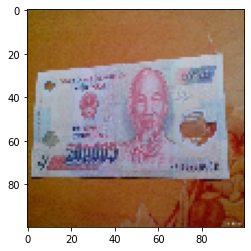

In [27]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/200000.webp')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation 500


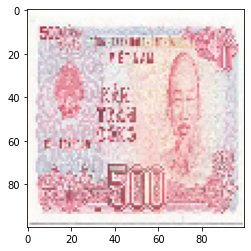

In [28]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/500.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation 10000


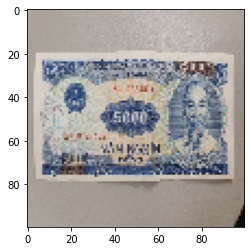

In [29]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/5000.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation 1000


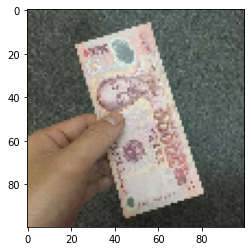

In [31]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/50000.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation 200000


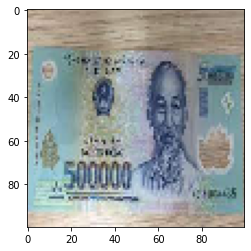

In [32]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '1000',
          1: '10000',
          2: '100000',
          3: '2000',
          4: '20000',
          5: '200000',
          6: '500',
          7: '5000',
          8: '50000',
          9: '500000',
          }
model = load_model('baitapphanloaitienVN.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/Tiền VN/Train Data/Test Data/500000.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 